In [6]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
subject_id = 'c1s01'
version = 'v1'
dataset_dir = '../dataset'
subject_data_path = os.path.join(dataset_dir, 'data', f'{subject_id}.pkl')
df = pd.read_pickle(subject_data_path)

CGM_indices = df['CGM_idx'].unique()

cgm_df = df.groupby('CGM_idx').first()[['glucose', 'Timestamp']]
cgm_df.sort_values('Timestamp', inplace=True)
cgm_df['dt'] = cgm_df['Timestamp'].diff().dt.total_seconds().fillna(0)
cgm_df['date'] = cgm_df['Timestamp'].dt.date

dates = cgm_df['date'].unique()
num_dates = len(dates)
print(f'Number of dates: {num_dates}')

Number of dates: 15


### Cross-CGM (stratifited)

In [7]:
split_type = 'cross_cgm' # 'cross_cgm' or 'cross_date' 
metadata_path = os.path.join(dataset_dir, 'metadata', split_type, f'{subject_id}.json')

with open(metadata_path, 'r') as f:
    metadata = json.load(f)

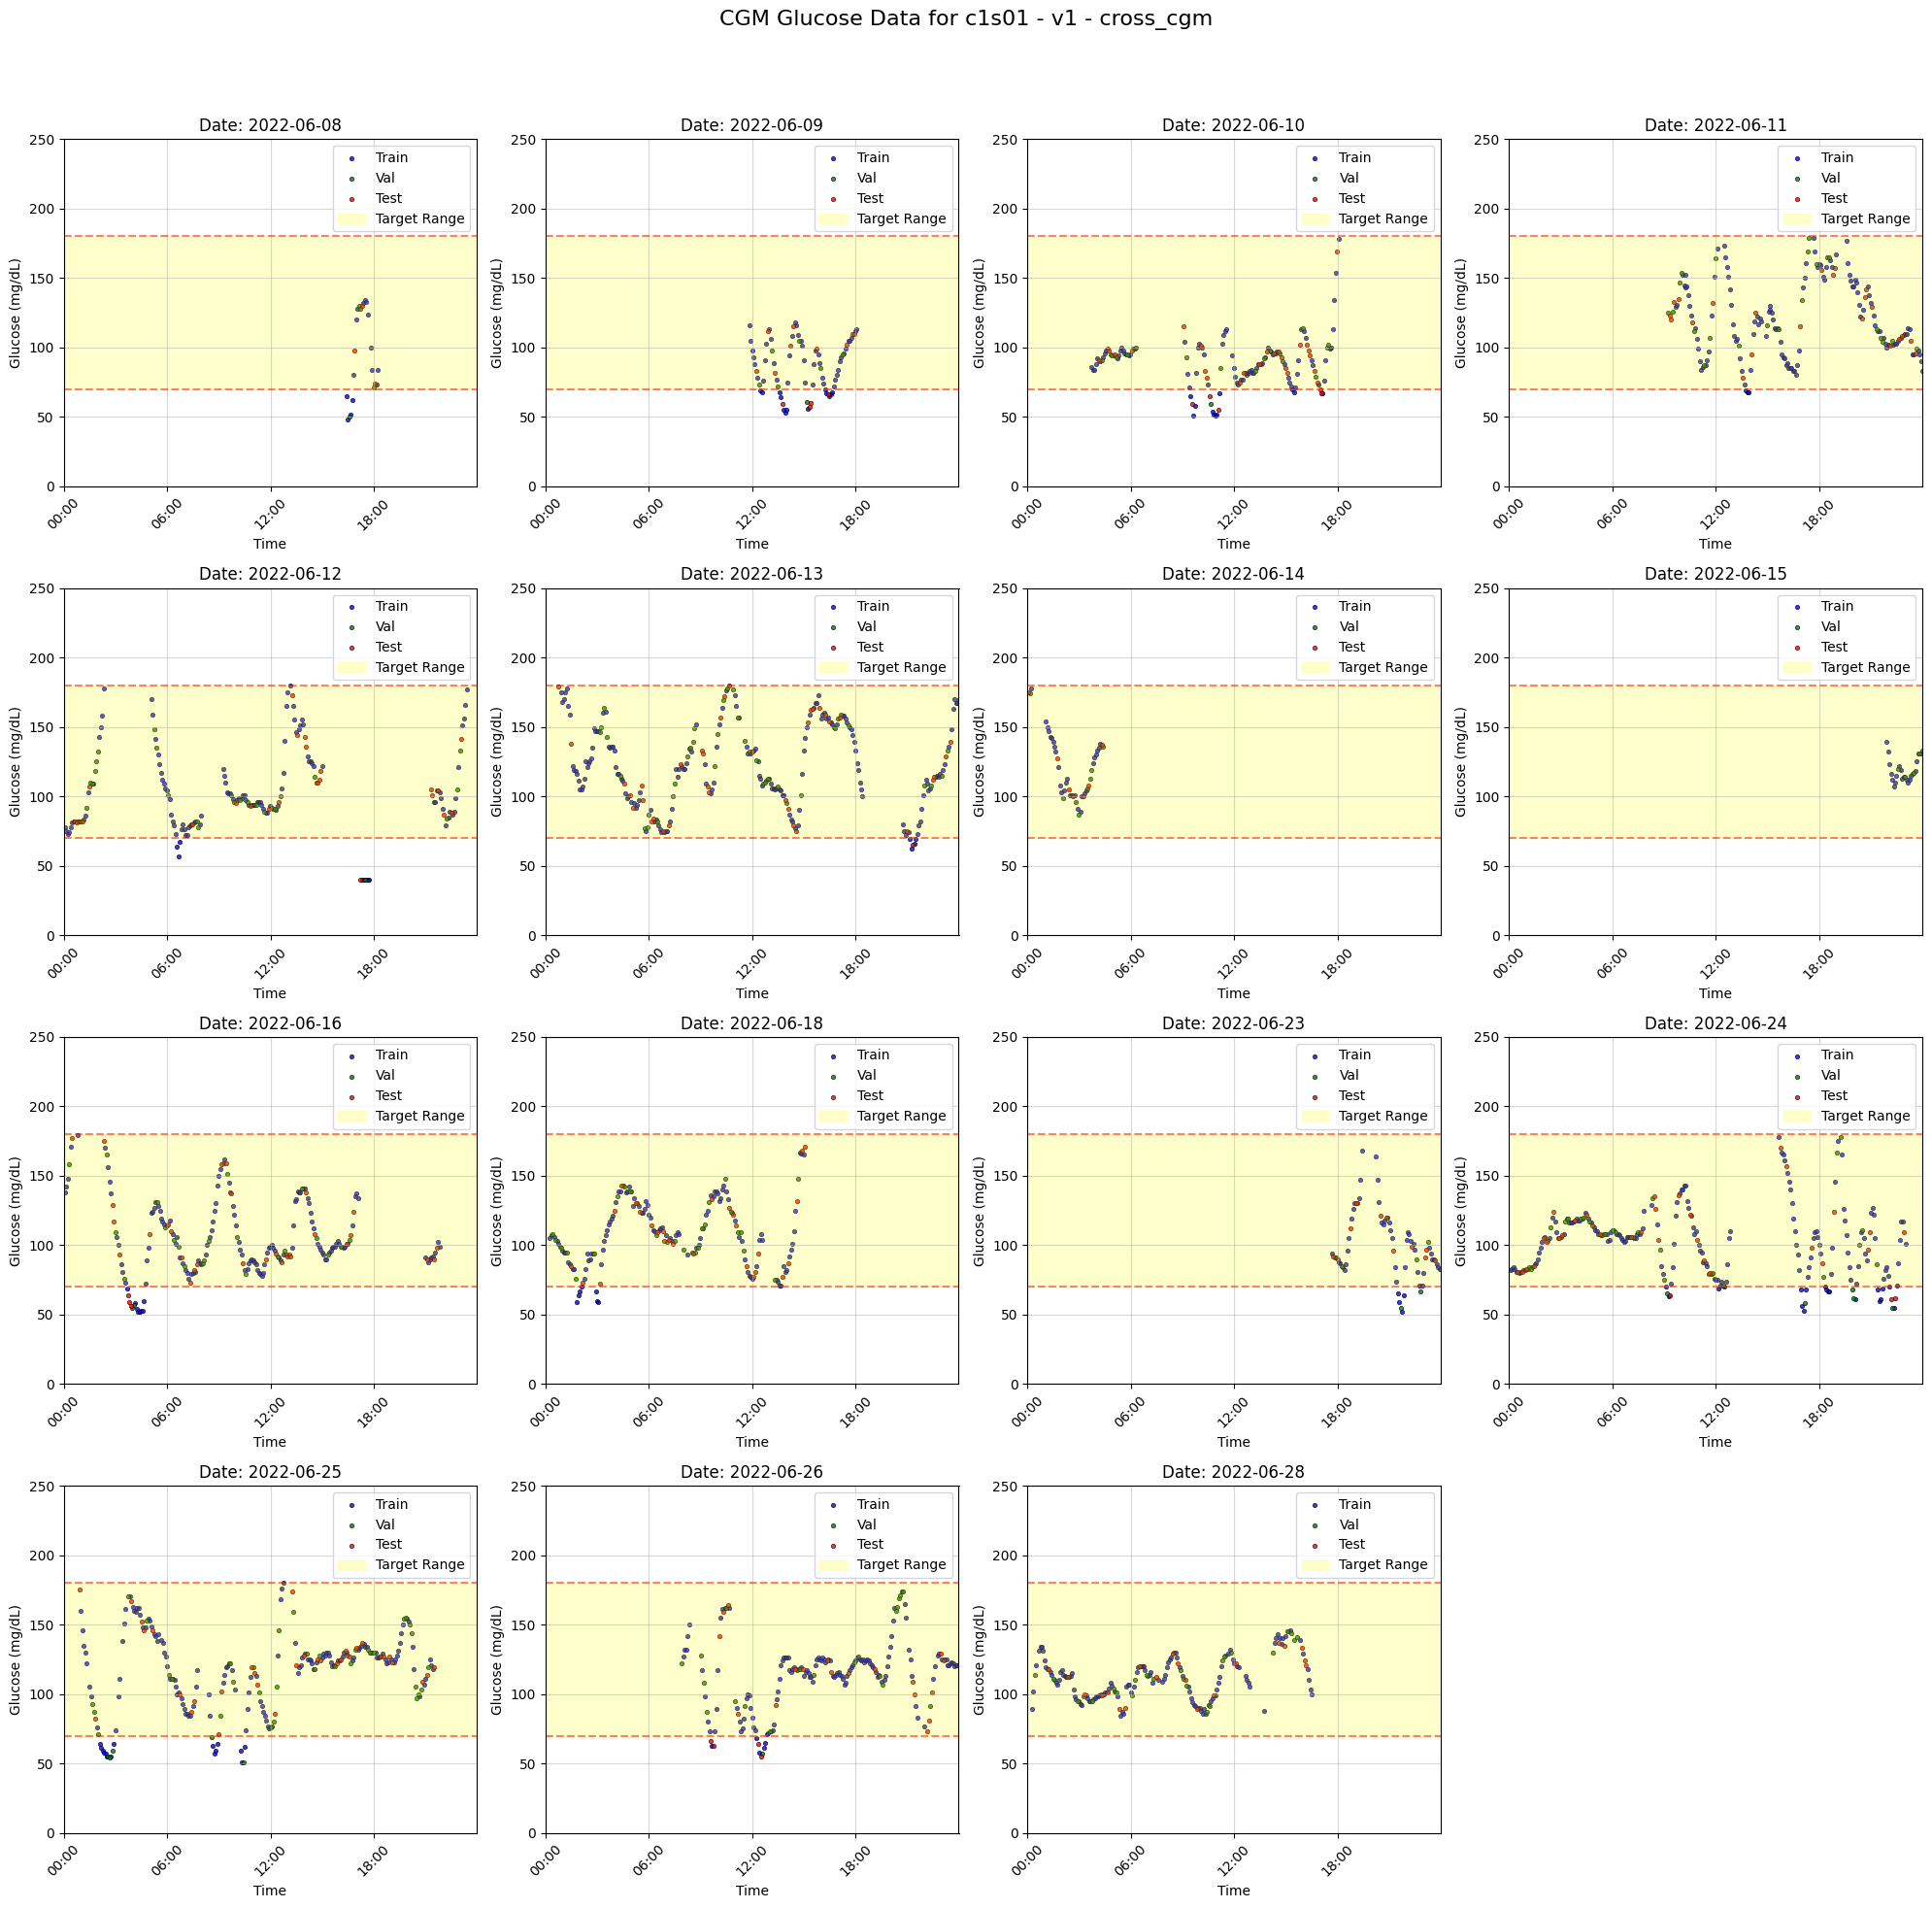

In [43]:
# Dynamic rows calculation
ncols = 4
nrows = -(-len(dates) // ncols)  # Ceiling division
fig, ax = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))

# Loop through dates
for i, date in enumerate(dates):
    row, col = divmod(i, ncols)
    date_df = cgm_df[cgm_df['date'] == date]

    train_df = date_df[date_df.index.isin(metadata[version]['train'])]
    val_df = date_df[date_df.index.isin(metadata[version]['val'])]
    test_df = date_df[date_df.index.isin(metadata[version]['test'])]

    # Plot scatter points
    ax[row, col].scatter(
        train_df['Timestamp'], train_df['glucose'], label='Train', color='blue',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    ax[row, col].scatter(
        val_df['Timestamp'], val_df['glucose'], label='Val', color='green',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    ax[row, col].scatter(
        test_df['Timestamp'], test_df['glucose'], label='Test', color='red',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    
    # Add shaded target range (e.g., 70-180)
    ax[row, col].fill_between(
        [pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59")],
        70, 180, color='yellow', alpha=0.2, label='Target Range'
    )
    
    # Formatting x-axis
    ax[row, col].set_xlim(pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59"))
    ax[row, col].set_xticks(pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H'))
    ax[row, col].set_xticklabels(
        [t.strftime('%H:%M') for t in pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H')],
        rotation=45
    )
    ax[row, col].hlines(y=70, xmin=ax[row, col].get_xlim()[0], xmax=ax[row, col].get_xlim()[1], color='red', linestyle='--', alpha=0.5)
    ax[row, col].hlines(y=180, xmin=ax[row, col].get_xlim()[0], xmax=ax[row, col].get_xlim()[1], color='red', linestyle='--', alpha=0.5)
    ax[row, col].set_ylim(0, 250)
    ax[row, col].set_ylabel('Glucose (mg/dL)')
    ax[row, col].set_xlabel('Time')
    ax[row, col].grid(alpha=0.5)
    ax[row, col].set_title(f"Date: {date}")
    ax[row, col].legend()

# Turn off empty axes
for i in range(len(dates), nrows * ncols):
    row, col = divmod(i, ncols)
    ax[row, col].axis('off')

# Main title and layout
plt.suptitle(f'CGM Glucose Data for {subject_id} - {version} - {split_type}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()


### Cross-Date

In [45]:
split_type = 'cross_date' # 'cross_cgm' or 'cross_date' 
metadata_path = os.path.join(dataset_dir, 'metadata', split_type, f'{subject_id}.json')

with open(metadata_path, 'r') as f:
    metadata = json.load(f)

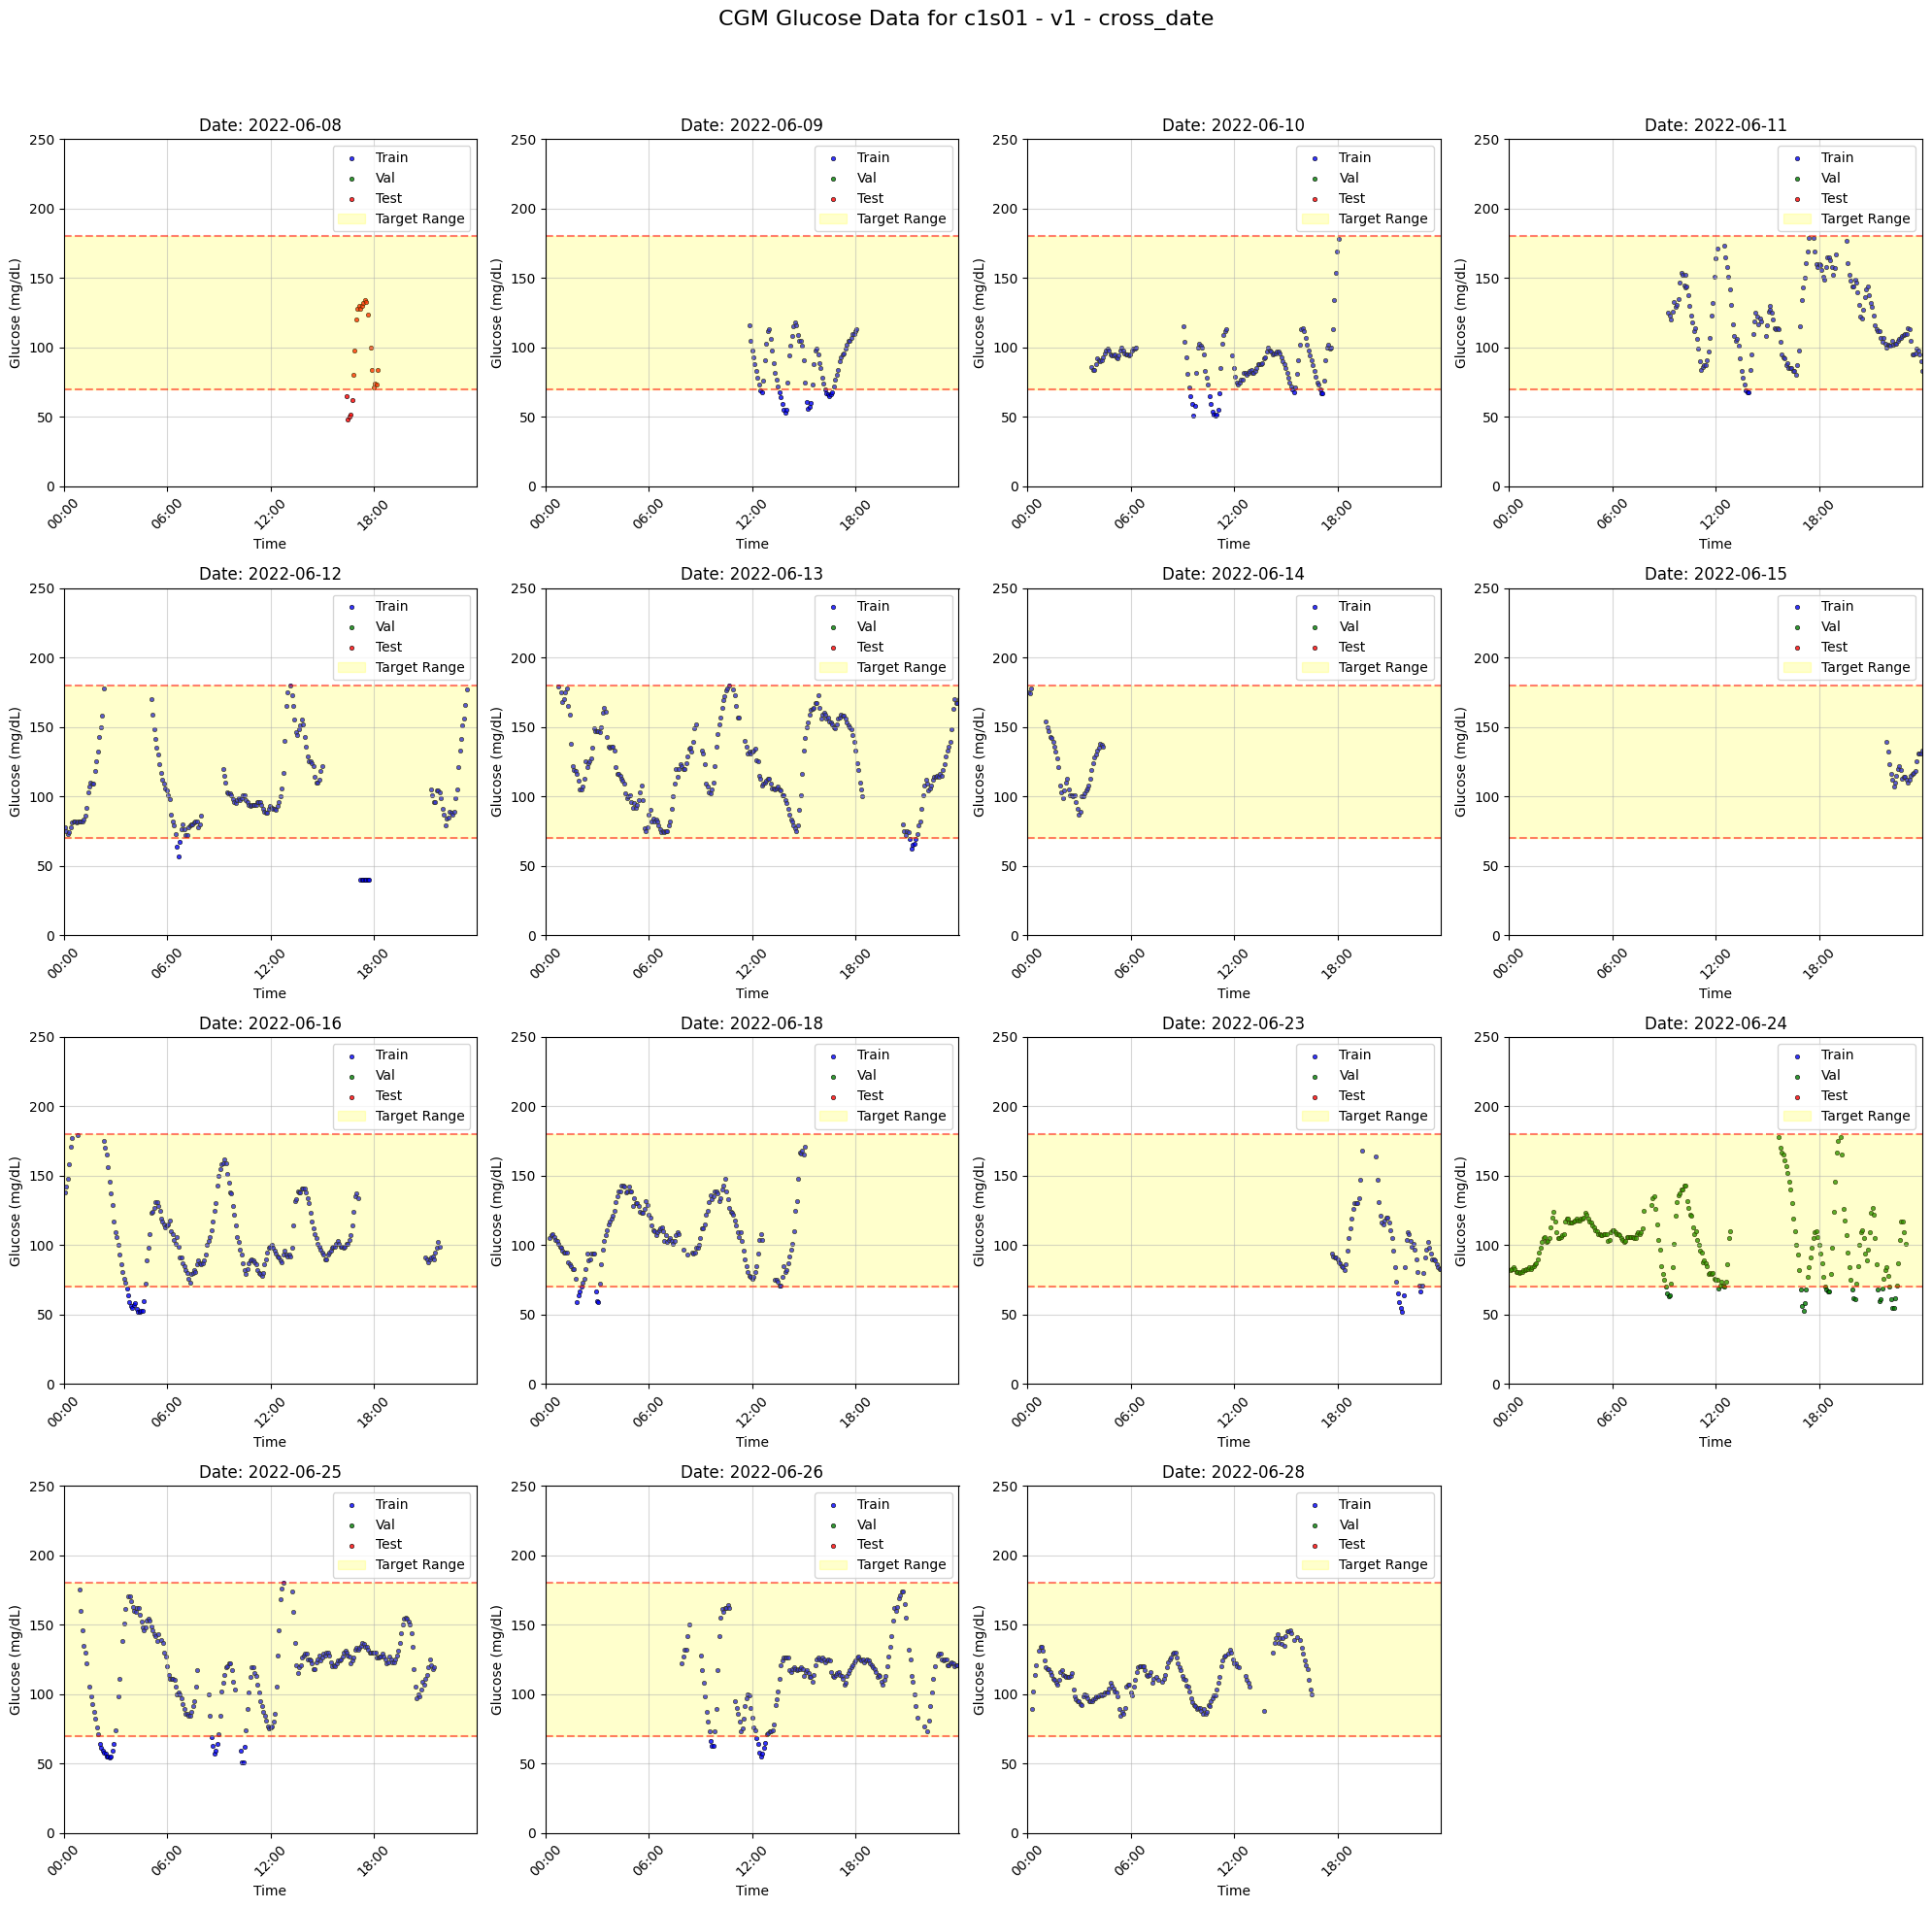

In [48]:
# Dynamic rows calculation
ncols = 4
nrows = -(-len(dates) // ncols)  # Ceiling division
fig, ax = plt.subplots(nrows, ncols, figsize=(20, nrows * 5))

# Loop through dates
for i, date in enumerate(dates):
    row, col = divmod(i, ncols)
    date_df = cgm_df[cgm_df['date'] == date]

    train_df = date_df[date_df.index.isin(metadata[version]['train'])]
    val_df = date_df[date_df.index.isin(metadata[version]['val'])]
    test_df = date_df[date_df.index.isin(metadata[version]['test'])]

    # Plot scatter points
    ax[row, col].scatter(
        train_df['Timestamp'], train_df['glucose'], label='Train', color='blue',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    ax[row, col].scatter(
        val_df['Timestamp'], val_df['glucose'], label='Val', color='green',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    ax[row, col].scatter(
        test_df['Timestamp'], test_df['glucose'], label='Test', color='red',
        marker='o', alpha=0.8, s=10, edgecolor='k', linewidth=0.5
    )
    
    # Add shaded target range (e.g., 70-180)
    ax[row, col].fill_between(
        [pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59")],
        70, 180, color='yellow', alpha=0.2, label='Target Range'
    )
    
    # Formatting x-axis
    ax[row, col].set_xlim(pd.Timestamp(f"{date} 00:00"), pd.Timestamp(f"{date} 23:59"))
    ax[row, col].set_xticks(pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H'))
    ax[row, col].set_xticklabels(
        [t.strftime('%H:%M') for t in pd.date_range(start=f'{date} 00:00', end=f'{date} 23:59', freq='6H')],
        rotation=45
    )
    ax[row, col].hlines(y=70, xmin=ax[row, col].get_xlim()[0], xmax=ax[row, col].get_xlim()[1], color='red', linestyle='--', alpha=0.5)
    ax[row, col].hlines(y=180, xmin=ax[row, col].get_xlim()[0], xmax=ax[row, col].get_xlim()[1], color='red', linestyle='--', alpha=0.5)
    ax[row, col].set_ylim(0, 250)
    ax[row, col].set_ylabel('Glucose (mg/dL)')
    ax[row, col].set_xlabel('Time')
    ax[row, col].grid(alpha=0.5)
    ax[row, col].set_title(f"Date: {date}")
    ax[row, col].legend()

# Turn off empty axes
for i in range(len(dates), nrows * ncols):
    row, col = divmod(i, ncols)
    ax[row, col].axis('off')

# Main title and layout
plt.suptitle(f'CGM Glucose Data for {subject_id} - {version} - {split_type}', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for suptitle
plt.show()
